In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/data

/content/drive/MyDrive/data


In [71]:
ls

BEML.csv           Elon_musk.csv      mywt.kmw.data-00000-of-00001
Cars.csv           Elon_musk_p_n.csv  mywt.kmw.index
checkpoint         fig.jpg            NLP-food-review.csv
claimants.csv      Fraud_check.csv    pima-indians-diabetes.csv
Company_Data.csv   GLAXO.csv          Salary_Data.csv
delivery_time.csv  iris.csv           Titanic.csv
diabetes.csv       Movie.csv          wc-at.csv


In [6]:
#Assignment1 -- Delivery_time -> Predict delivery time using sorting time
#data source -- delivery_time.csv

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
dTime=pd.read_csv("delivery_time.csv")

In [10]:
dTime.shape

(21, 2)

In [11]:
dTime.head(2)

,Delivery Time,Sorting Time
0,21.0,10
1,13.5,4


In [30]:
x=dTime.iloc[:,0:1]
y=dTime.iloc[:,1]

In [47]:
#from sklearn.model_selection import train_test_split

In [48]:
#x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=10)

In [17]:
dTime.corr()#high correlation between delivery and sorting time- not randomly scattered data

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


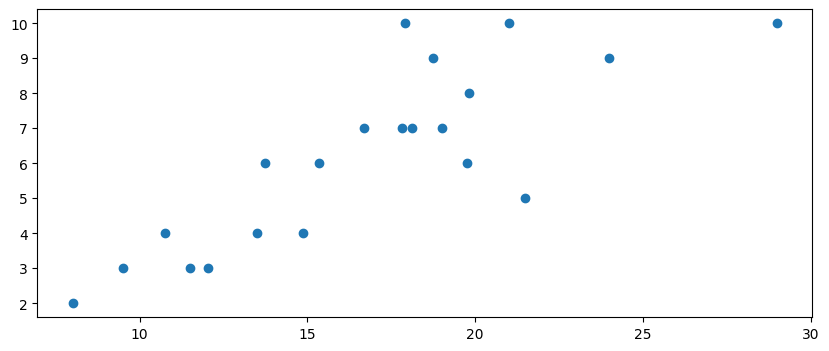

In [27]:
plt.figure(figsize=(10,4))
plt.scatter(x,y)
plt.show()

In [19]:
#linear data with one independent and one dependent variable- Linear Regression Model

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
#from sklearn import .. we get linear_model as suggestion, add it to sklearn.linear_model and in import we get LinearRegression as suggesstion

In [53]:
model_dTime=LinearRegression().fit(x,y)
#if we use dTime.iloc[:,0] throws error use dTime.iloc[:,0:1]

In [51]:
m=dTime.iloc[:,0]
m

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: Delivery Time, dtype: float64

In [50]:
x

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


In [54]:
model_dTime.intercept_#c

-0.7566733660351268

In [55]:
model_dTime.coef_#m

array([0.41374363])

In [56]:
yhat=model_dTime.predict(x)

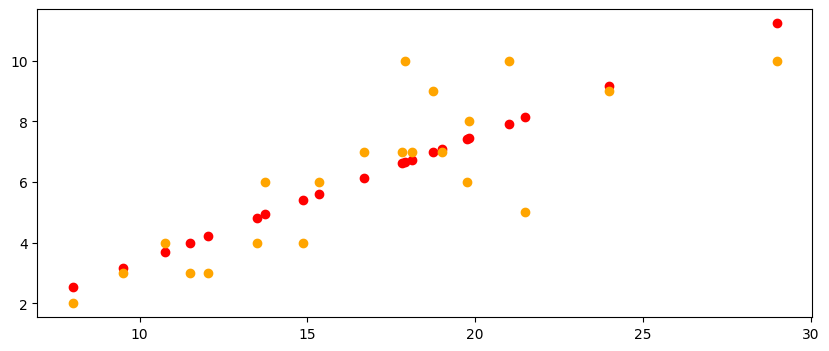

In [93]:
plt.figure(figsize=(10,4))
plt.scatter(x,yhat,color="red")
plt.scatter(x,y,color="orange")
plt.show()

In [58]:
r2_score(y,yhat)

0.682271474841723

In [60]:
#we got r2 score as 0.68. We can add a little non-collinearity to make the model more accurate

In [63]:
import statsmodels.formula.api as smf

In [66]:
dTime.head(2)

,Delivery Time,Sorting Time
0,21.0,10
1,13.5,4


In [72]:
model=smf.ols("y~x",data=dTime).fit()

In [73]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           3.98e-06
Time:                        08:37:52   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7567      1.134     -0.667      0.513      -3.130       1.617
x              0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
model1=smf.ols("np.log(y)~x**2+np.log(x)",data=dTime).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(y)   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     34.77
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           6.57e-07
Time:                        08:40:52   Log-Likelihood:                 3.2689
No. Observations:                  21   AIC:                           -0.5378
Df Residuals:                      18   BIC:                             2.596
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7703      1.440     -2.618      0.017      -6.796      -0.745
x             -0.0718      0.051     -1.395      0.180      -0.180       0.036
np.log(x)      2.4162      0.821      2.943      0.009       0.691       4.141
==============================================================================
Omnibus:                        1.227   Durbin-Watson:                   1.210
Prob(Omnibus):                  0.541   Jarque-Bera (JB):                0.806
Skew:                          -0.470   Prob(JB):                        0.668
Kurtosis:                       2.807   Cond. No.                         602.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
#the model accuracy has increased from 68% to 79%, I think this is one of the best model for this data

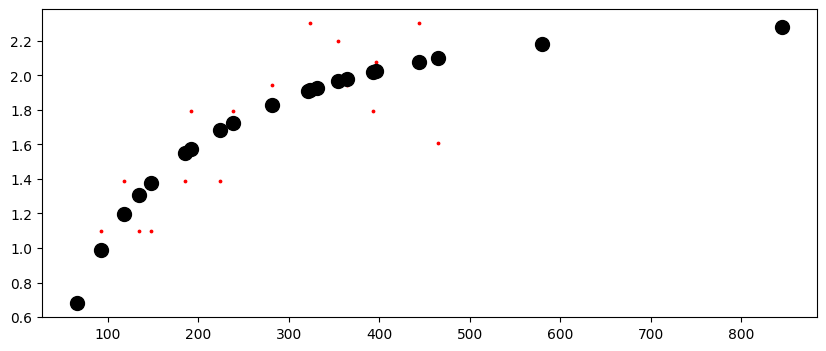

In [89]:
plt.figure(figsize=(10,4))
plt.scatter(x**2+np.log(x),np.log(y),color="red",s=3)
plt.scatter(x**2+np.log(x),model1.fittedvalues,color="black",s=100)
plt.show()